In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('global-data-on-sustainable-energy.csv')
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [3]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

<Axes: >

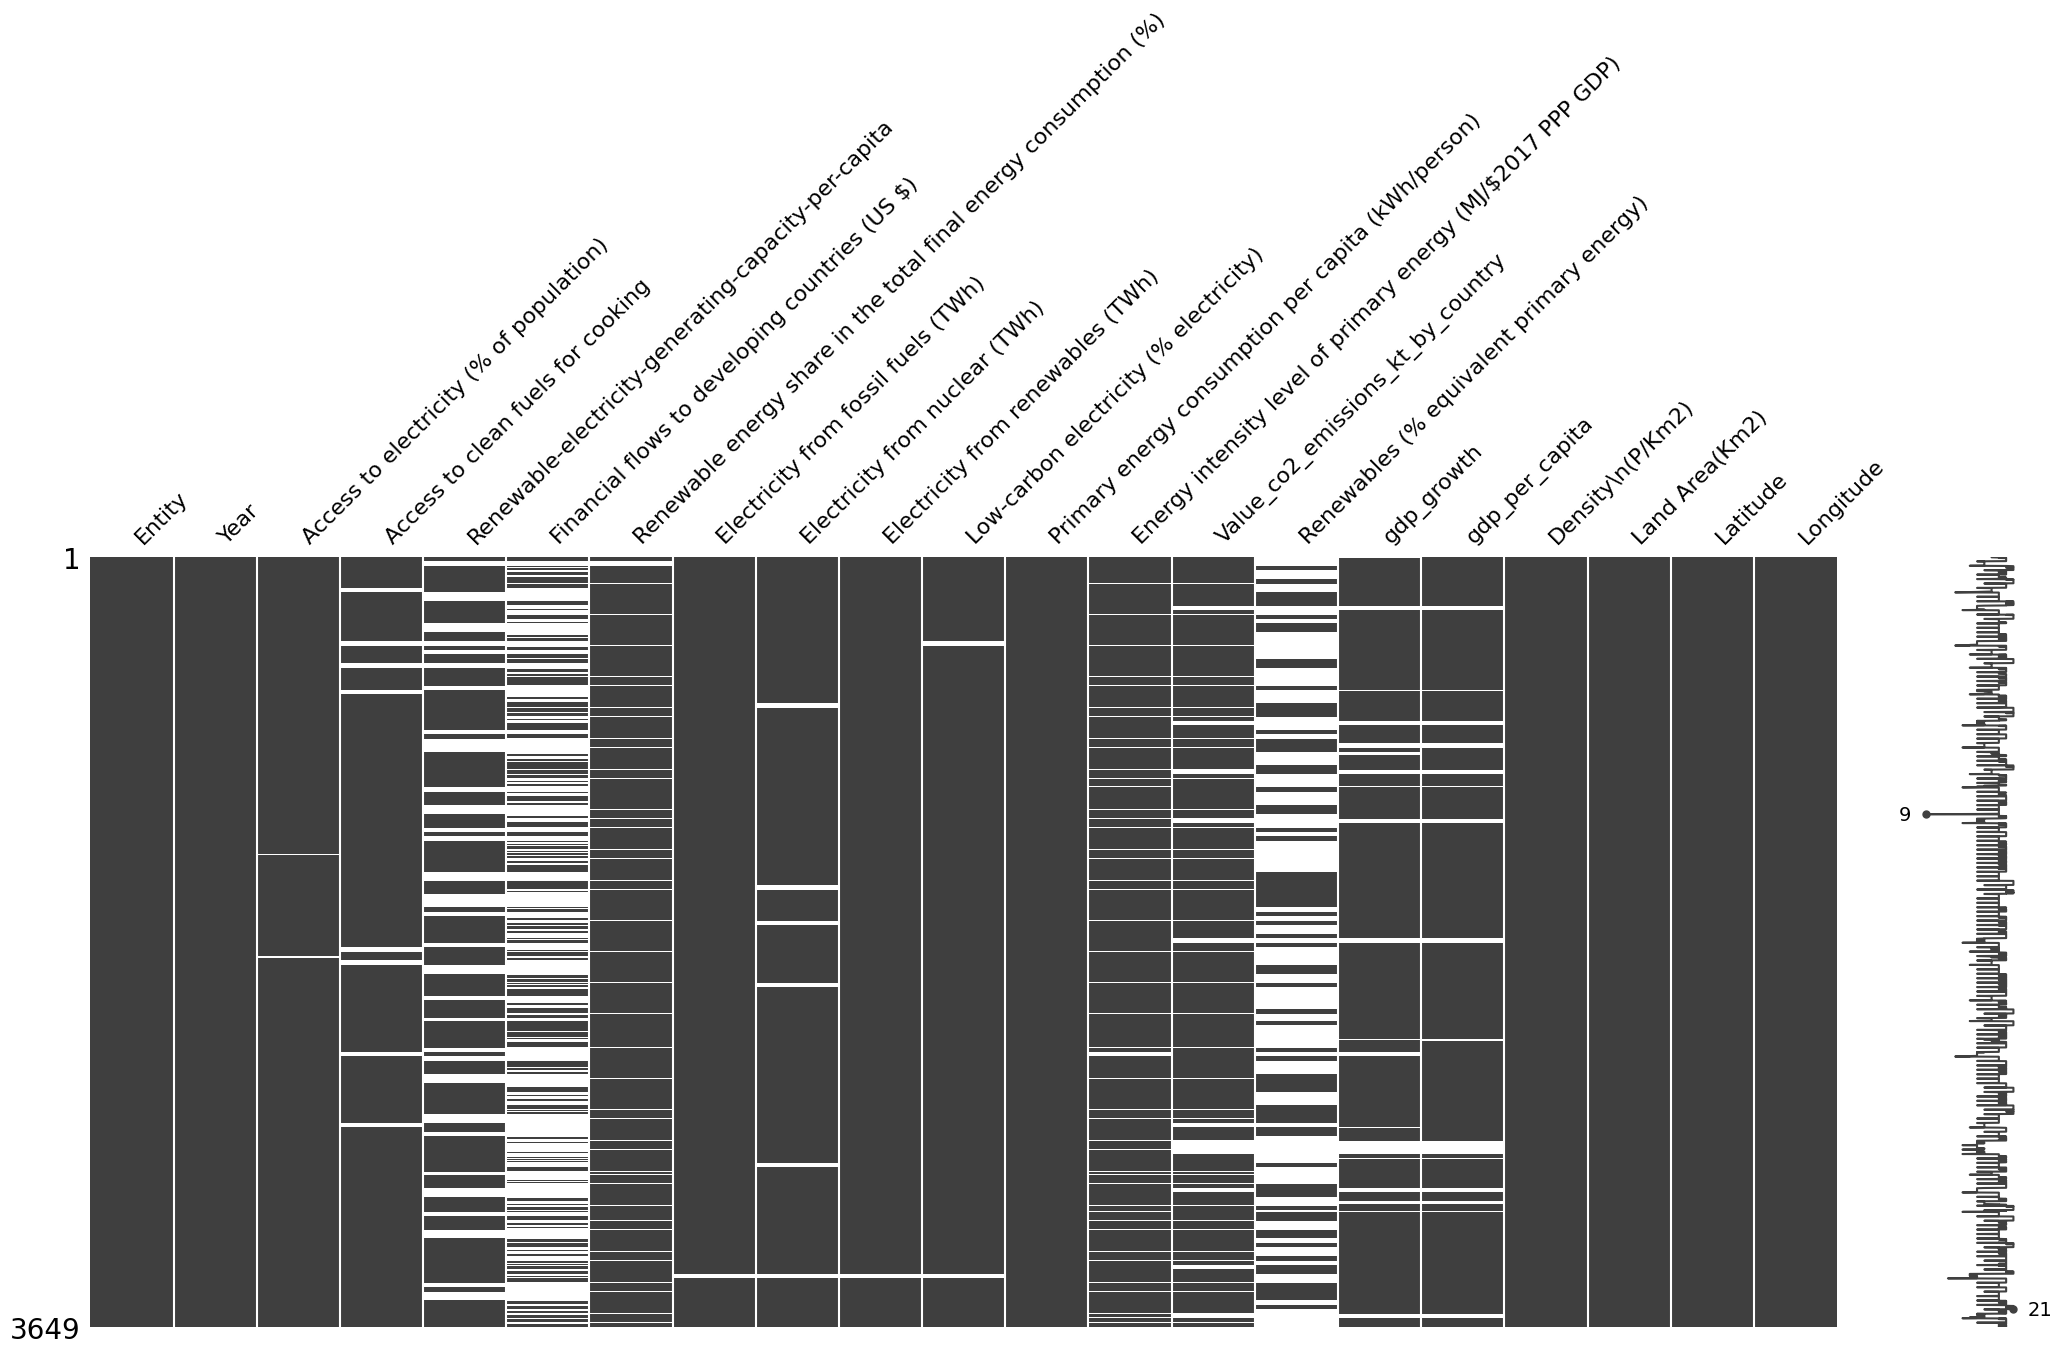

In [5]:
msno.matrix(df)

In [6]:
df.isna().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

Based on the missing value analysis, 'Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)' and 'Renewable-electricity-generating-capacity-per-capita' contains the most number of missing value among the features.

In [7]:
# drop most null value columns and unused columns
drop_cols = df[['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)', 'Renewable-electricity-generating-capacity-per-capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']]
df.drop(columns=drop_cols, inplace=True)

In [8]:
# Calculate mean for specific columns
Mean_Access_Fuels = df['Access to clean fuels for cooking'].mean()
Mean_Access_Electricity = df['Access to electricity (% of population)'].mean()
Mean_Renewable = df['Renewable energy share in the total final energy consumption (%)'].mean()
Mean_Electricity_Nuclear = df['Electricity from nuclear (TWh)'].mean()
Mean_Electricity_Fuels = df['Electricity from fossil fuels (TWh)'].mean()
Mean_Electricity_Renewables = df['Electricity from renewables (TWh)'].mean()
Mean_Low_Carbon = df['Low-carbon electricity (% electricity)'].mean()
Mean_Energy = df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean()
Mean_Value_co2 = df['Value_co2_emissions_kt_by_country'].mean()
Mean_gdp_growth = df['gdp_growth'].mean()
Mean_gdp_per_capita = df['gdp_per_capita'].mean()

# Fill missing values in specific columns with calculated means
df['Access to clean fuels for cooking'].fillna(Mean_Access_Fuels, inplace=True)
df['Access to electricity (% of population)'].fillna(Mean_Access_Electricity, inplace=True)
df['Renewable energy share in the total final energy consumption (%)'].fillna(Mean_Renewable, inplace=True)
df['Electricity from nuclear (TWh)'].fillna(Mean_Electricity_Nuclear, inplace=True)
df['Electricity from fossil fuels (TWh)'].fillna(Mean_Electricity_Fuels, inplace=True)
df['Electricity from renewables (TWh)'].fillna(Mean_Electricity_Renewables, inplace=True)
df['Low-carbon electricity (% electricity)'].fillna(Mean_Low_Carbon, inplace=True)
df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(Mean_Energy, inplace=True)
df['Value_co2_emissions_kt_by_country'].fillna(Mean_Value_co2, inplace=True)
df['gdp_growth'].fillna(Mean_gdp_growth, inplace=True)
df['gdp_per_capita'].fillna(Mean_gdp_per_capita, inplace=True)

In [9]:
# drop any rows that contain null values and check remaining data shape
df = df.dropna()
df.shape

(3649, 14)

In [10]:
df.isna().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita                                                      0
dtype: int64

In [11]:
# Finding duplicate rows
duplicate_rows = df[df.duplicated(keep='first')]

# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [12]:
df.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_emissions_kt_by_country                                   float64
gdp_growth                                                          float64
gdp_per_capi

In [13]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.441610,13283.774348
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.441610,13283.774348
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.441610,179.426579
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074
